In [173]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [156]:
# Transformation of results
def result(predictions):
    result_list=[]
    for pred in predictions:
        result = pred // 0.5 * 0.5
        if (pred - result) > 0.25:
            result += 0.5
        if result < 1.0:
            result = 1.0
        if result > 5.0:
            result = 5.0
        result_list.append(result)
    return result_list

In [145]:
# Accuracy score
def accuracy(Ytrue, Ypred):
    Ytrue=Ytrue.tolist()
    accurate = 0
    for i in range(len(Ytrue)):
        if Ytrue[i] == Ypred[i]:
            accurate += 1
    return accurate / len(Ytrue)

In [146]:
# Proposed Score: include +- 0.5 away from true value
def accuracy_range(Ytrue, Ypred):
    Ytrue=Ytrue.tolist()
    accurate_range=0
    for i in range(len(Ytrue)):
        if abs(Ytrue[i] - Ypred[i])<=0.5:
            accurate_range+=1
    return accurate_range/len(Ytrue)

In [147]:
# Total error / total number of points => by average what's the error for each point
def error_rate(Ytrue, Ypred):
    Ytrue=Ytrue.tolist()
    error=0
    for i in range(len(Ytrue)):
        error += abs(Ytrue[i] - Ypred[i])
    return error/len(Ytrue)

In [175]:
# Plot the distribution of difference between prediction and true value
def result_diff_plot(Ytrue,Ypred):
    diff=Ytrue-Ypred
    plt.hist(diff, 30)
    
    plt.xlabel('Difference to Actual Score')
    plt.ylabel('Total Counts')
    plt.title('Distribution of Difference Between Prediction and True Score')
    plt.grid(True)
    plt.show()

# Random Forest Regression

## Cohesion

In [149]:
data=pd.read_csv('Processed_Data.csv')
data.head()

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,number_of_words,stopwords_frequency,av_word_per_sen,...,ttr,coherence_score,lexrank_avg_min_diff,lexrank_interquartile,freq_of_noun,freq_of_transition,freq_of_pronoun,noun_to_adj,verb_to_adv,phrase_diversity
0,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,0.498084,14.500000,...,0.099639,0.422997,0.245068,0.275570,0.203065,0.065134,0.111111,0.377358,0.317073,0.119650
1,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,0.581614,38.071429,...,0.055175,0.506789,0.398650,0.397796,0.200750,0.061914,0.103189,0.373832,0.296875,0.110981
2,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,0.515625,16.842105,...,0.073317,0.472376,0.699098,0.433225,0.221875,0.043750,0.090625,0.380282,0.277778,0.105634
3,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,0.559066,20.222222,...,0.055877,0.412691,0.629558,0.498259,0.188187,0.043956,0.119505,0.569343,0.184466,0.105024
4,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,0.521368,78.000000,...,0.085833,0.551796,0.110281,0.096727,0.230769,0.034188,0.119658,0.481481,0.150000,0.072222


In [150]:
data.columns

Index(['full_text', 'cohesion', 'syntax', 'vocabulary', 'phraseology',
       'grammar', 'conventions', 'number_of_words', 'stopwords_frequency',
       'av_word_per_sen', 'punctuations', 'ARI', 'freq_of_verb', 'freq_of_adj',
       'freq_of_adv', 'freq_of_distinct_adj', 'freq_of_distinct_adv',
       'sentence_complexity', 'freq_of_wrong_words', 'sentiment_compound',
       'sentiment_positive', 'sentiment_negative', 'num_of_grammar_errors',
       'corrected_text', 'num_of_short_forms', 'Incorrect_form_ratio',
       'flesch_reading_ease', 'flesch_kincaid_grade',
       'dale_chall_readability_score', 'text_standard', 'mcalpine_eflaw',
       'number_of_diff_words', 'freq_diff_words', 'ttr', 'coherence_score',
       'lexrank_avg_min_diff', 'lexrank_interquartile', 'freq_of_noun',
       'freq_of_transition', 'freq_of_pronoun', 'noun_to_adj', 'verb_to_adv',
       'phrase_diversity'],
      dtype='object')

In [151]:
X = data[['stopwords_frequency','av_word_per_sen', 'punctuations', 'ARI', 'freq_of_verb', 'freq_of_adj',
       'freq_of_adv', 'freq_of_distinct_adj', 'freq_of_distinct_adv',
       'sentence_complexity', 'freq_of_wrong_words', 'sentiment_compound',
       'sentiment_positive', 'sentiment_negative', 'num_of_grammar_errors',
       'num_of_short_forms', 'Incorrect_form_ratio',
       'flesch_reading_ease', 'flesch_kincaid_grade',
       'dale_chall_readability_score', 'text_standard', 'mcalpine_eflaw',
       'number_of_diff_words', 'freq_diff_words', 'ttr', 'coherence_score',
       'lexrank_avg_min_diff', 'lexrank_interquartile', 'freq_of_noun',
       'freq_of_transition', 'freq_of_pronoun', 'noun_to_adj', 'verb_to_adv',
       'phrase_diversity']]
Y_total = data[['cohesion'
          ,'syntax'
          ,'vocabulary'
          ,'phraseology'
          ,'conventions'
          ,'grammar'
         ]]
feature_names = X.columns.tolist()

In [152]:
Xtrain, Xtest, Y_total_train, Y_total_test = train_test_split(X,Y_total,test_size=0.2, random_state=42)
Ytrain=Y_total_train['cohesion']
Ytest=Y_total_test['cohesion']

In [153]:
ss = StandardScaler()

X=ss.fit_transform(X)
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.fit_transform(Xtest)

In [70]:
# Sample run
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=100, random_state=90)
rfr.fit(Xtrain, Ytrain)

RandomForestRegressor(random_state=90)

In [71]:
predictions=rfr.predict(Xtest)
results=result(predictions.tolist())

In [72]:
score=accuracy(Ytest.tolist(), results)
score

0.3333333333333333

### Parameter Tuning

In [73]:
target=Y_total['cohesion']

In [74]:
# Customize cross validation function
def cross_validation(model,features,target):
    score_list=[]
    for i in range(10):
        X_train_cross, X_test_cross, Y_train_cross, Y_test_cross=train_test_split(features, target, test_size=0.2)
        model.fit(X_train_cross, Y_train_cross)
        predictions=model.predict(X_test_cross)
        results=result(predictions.tolist())
        score=accuracy(Y_test_cross.tolist(), results)
        score_list.append(score)
    return sum(score_list)/10

0.35555555555555557 161


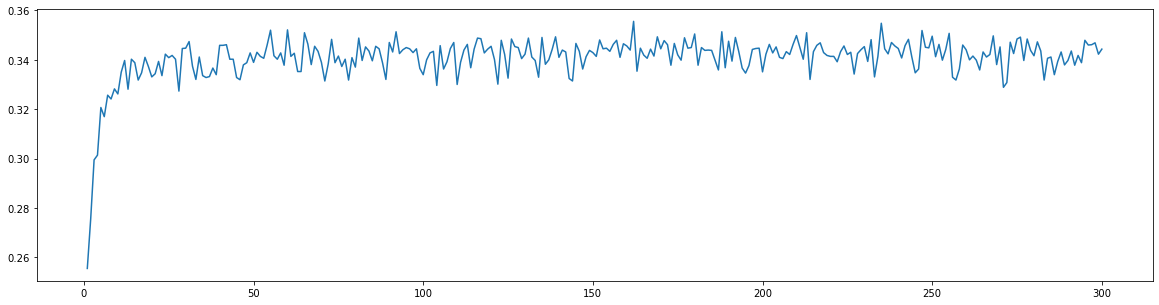

In [75]:
# Find best n_estimator
superpa_n = []
for i in range(300):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=i+1, random_state=90)
    rfr_s = cross_validation(rfr, X, target)
    superpa_n.append(rfr_s)
print(max(superpa_n),superpa_n.index(max(superpa_n)))
plt.figure(figsize=[20,5])
plt.plot(range(1,301),superpa_n)
plt.show()

In [76]:
# max depth
depth_grid={'max_depth':np.arange(1,20,1)}
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=161, random_state=90)

GS = GridSearchCV(rfr, depth_grid, cv=10)
GS.fit(X,target)

print('Best parameter: {}, best score: {}'.format(GS.best_params_, GS.best_score_))

Best parameter: {'max_depth': 8}, best score: 0.3241668979947497


In [77]:
# min sample leaf
leaf_grid={'min_samples_leaf':np.arange(1,20,1)}
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=161, random_state=90)

GS = GridSearchCV(rfr, leaf_grid, cv=10)
GS.fit(X,target)

print('Best parameter: {}, best score: {}'.format(GS.best_params_, GS.best_score_))

Best parameter: {'min_samples_leaf': 5}, best score: 0.3209686778038502


In [78]:
# min sample split
split_grid={'min_samples_split':np.arange(2,22,1)}
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=161,random_state=90)

GS = GridSearchCV(rfr, split_grid, cv=10)
GS.fit(X,target)

print('Best parameter: {}, best score: {}'.format(GS.best_params_, GS.best_score_))

Best parameter: {'min_samples_split': 21}, best score: 0.32271793719398856


In [88]:
# max features
feature_grid = {'max_features':np.arange(5,30,1)}
rfr = RandomForestRegressor(criterion='squared_error', n_estimators=91,random_state=90)

GS = GridSearchCV(rfr, feature_grid, cv=10)
GS.fit(X,target)

print('Best parameter: {}, best score: {}'.format(GS.best_params_, GS.best_score_))

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dis

Best parameter: {'max_features': 6}, best score: 0.32374012986616446


In [154]:
rfr_modified = RandomForestRegressor(n_estimators=161,random_state=90
#                                     ,max_depth=8
#                                     ,min_samples_leaf=7
#                                     ,min_samples_split=21
                                    )

rfr_modified.fit(Xtrain, Ytrain)

RandomForestRegressor(n_estimators=161, random_state=90)

In [158]:
predictions_mod=rfr_modified.predict(Xtest)
results_mod=result(predictions_mod.tolist())
score_mod=accuracy(Ytest, results_mod)
score_mod

0.34099616858237547

In [160]:
accuracy_range(Ytest, predictions_mod)

0.6206896551724138

In [161]:
error_rate(Ytest, results_mod)

0.4284802043422733

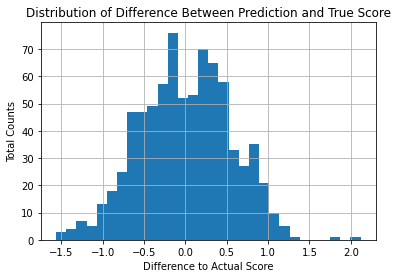

In [176]:
result_diff_plot(Ytest, predictions_mod)

As compared to before parameter tuning, the results improved slightly. This result is also better than classification model.

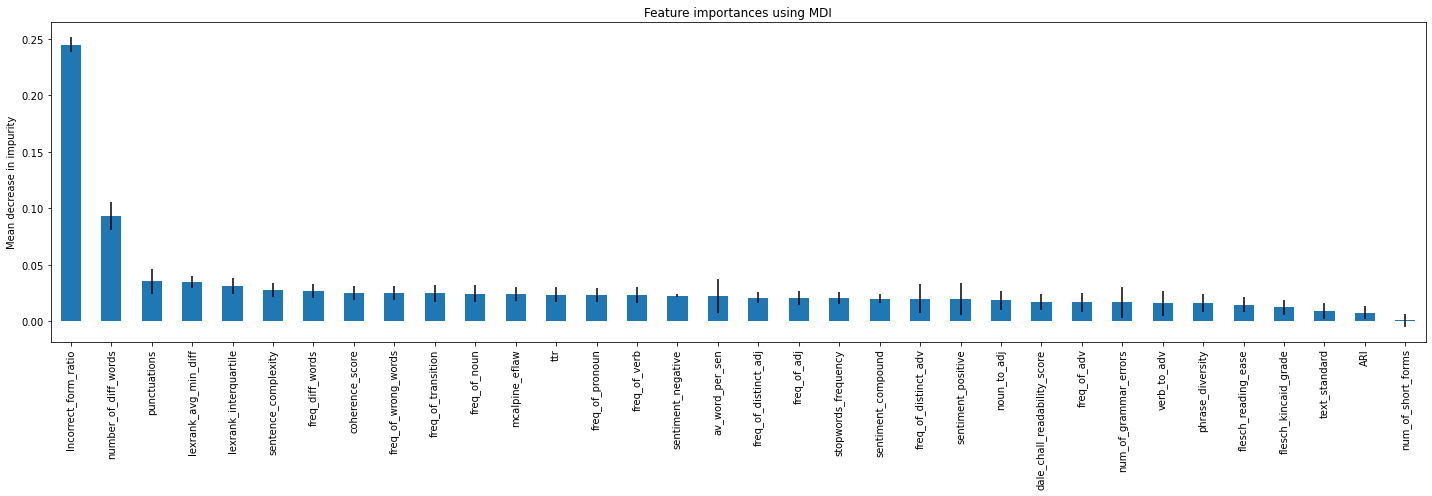

In [85]:
# Feature Importance using MDI
importances = rfr_modified.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_modified.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

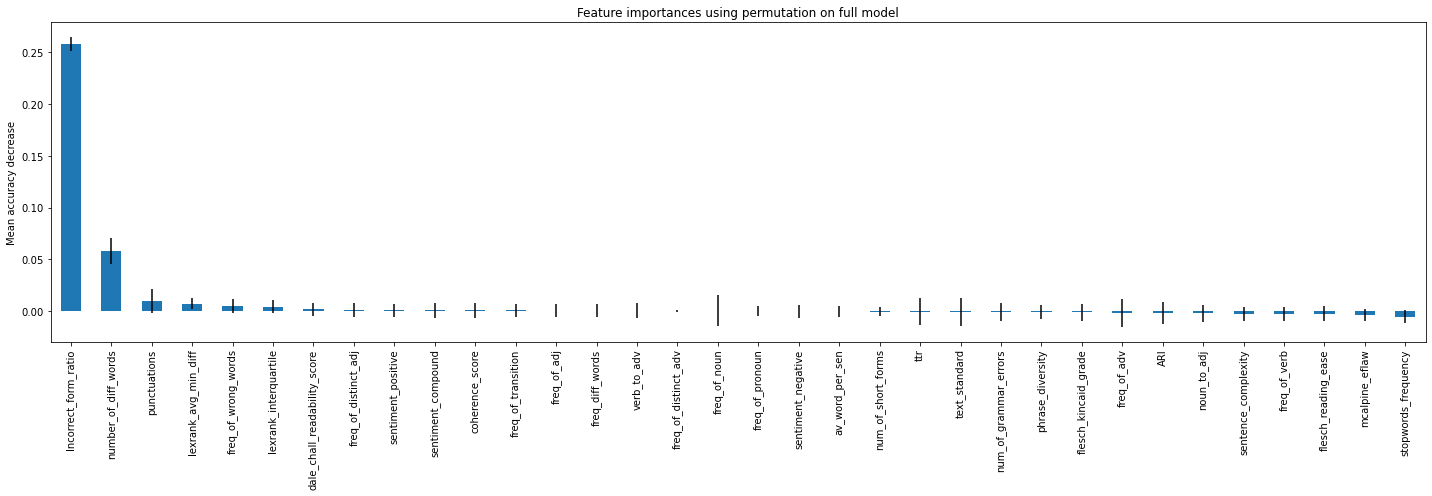

In [86]:
# Feature importance using feature permutation
result = permutation_importance(rfr_modified, Xtest, Ytest, n_repeats=10, random_state=90, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

In [87]:
forest_importances

Incorrect_form_ratio            0.257880
number_of_diff_words            0.058191
punctuations                    0.009944
lexrank_avg_min_diff            0.007380
freq_of_wrong_words             0.004865
lexrank_interquartile           0.004289
dale_chall_readability_score    0.001925
freq_of_distinct_adj            0.001130
sentiment_positive              0.001082
sentiment_compound              0.001048
coherence_score                 0.001048
freq_of_transition              0.000875
freq_of_adj                     0.000781
freq_diff_words                 0.000715
verb_to_adv                     0.000634
freq_of_distinct_adv            0.000624
freq_of_noun                    0.000537
freq_of_pronoun                 0.000259
sentiment_negative              0.000012
av_word_per_sen                -0.000114
num_of_short_forms             -0.000174
ttr                            -0.000465
text_standard                  -0.000590
num_of_grammar_errors          -0.000632
phrase_diversity

In [88]:
# Try remove features 
selected_features=forest_importances[:16].index.tolist()

In [89]:
X_selected=data[selected_features]

Xtrain_selected, Xtest_selected, Y_total_train, Y_total_test = train_test_split(X_selected,Y_total,test_size=0.2, random_state=42)
Ytrain=Y_total_train['cohesion']
Ytest=Y_total_test['cohesion']

In [90]:
rfr_modified.fit(Xtrain_selected, Ytrain)

RandomForestRegressor(n_estimators=161, random_state=90)

In [94]:
prediction_mod=rfr_modified.predict(Xtest_selected).tolist()
results_mod=result(prediction_mod)
score_mod=accuracy(Ytest.tolist(), results_mod)
score_mod

0.3486590038314176

Accuracy increased after dropping irrelevant features

### Vocabulary + Cohesion

In [95]:
Ytrain_vocab=Y_total_train['vocabulary']
Ytest_vocab=Y_total_test['vocabulary']

In [96]:
rfr_vocab=RandomForestRegressor(criterion='squared_error',n_estimators=100, random_state=90)
rfr_vocab.fit(Xtrain, Ytrain_vocab)

prediction_mod=rfr_vocab.predict(Xtest)
results_mod=result(predictions_mod.tolist())
score_mod=accuracy(Ytest_vocab.tolist(), results_mod)
score_mod

0.3895274584929757

### Parameter Tuning

In [97]:
target=Y_total['vocabulary']

0.44278416347381866 270


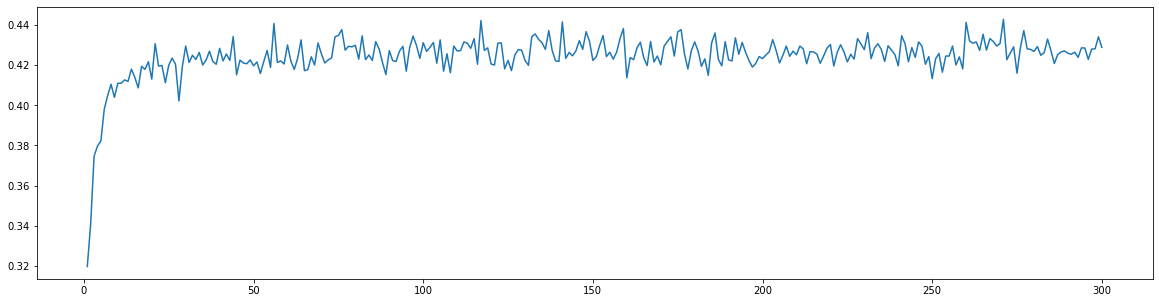

In [98]:
# Find best n_estimator
superpa_n = []
for i in range(300):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=i+1, random_state=90)
    rfr_s = cross_validation(rfr, X, target)
    superpa_n.append(rfr_s)
print(max(superpa_n),superpa_n.index(max(superpa_n)))
plt.figure(figsize=[20,5])
plt.plot(range(1,301),superpa_n)
plt.show()

In [99]:
# max depth
superpa_n = []
for i in range(1, 51):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=270, max_depth=i, random_state=90)
    rfr_s = cross_validation(rfr, X, target)
    superpa_n.append(rfr_s)

print('Best parameter: {}, best score: {}'.format(superpa_n.index(max(superpa_n)), max(superpa_n)))

Best parameter: 28, best score: 0.43690932311621966


In [100]:
# min sample leaf
superpa_n = []
for i in range(1, 21):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=270, min_samples_leaf=i, random_state=90)
    rfr_s = cross_validation(rfr, X, target)
    superpa_n.append(rfr_s)

print('Best parameter: {}, best score: {}'.format(superpa_n.index(max(superpa_n)), max(superpa_n)))

Best parameter: 14, best score: 0.43805874840357595


In [101]:
# min sample split
superpa_n = []
for i in range(2, 22):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=270, min_samples_split=i, random_state=90)
    rfr_s = cross_validation(rfr, X, target)
    superpa_n.append(rfr_s)

print('Best parameter: {}, best score: {}'.format(superpa_n.index(max(superpa_n)), max(superpa_n)))

Best parameter: 0, best score: 0.4353767560664112


In [56]:
# max features
superpa_n = []
for i in range(5, 35):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=270, max_features=i, random_state=90)
    rfr_s = cross_validation(rfr, X, target)
    superpa_n.append(rfr_s)

print('Best parameter: {}, best score: {}'.format(superpa_n.index(max(superpa_n)), max(superpa_n)))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\LI RUIQIAN\AppData\Local\Temp\ipykernel_40212\2413244794.py", line 5, in <cell line: 3>
    rfr_s = cross_validation(rfr, X, target)
  File "C:\Users\LI RUIQIAN\AppData\Local\Temp\ipykernel_40212\2177427530.py", line 6, in cross_validation
    model.fit(X_train_cross, Y_train_cross)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    "len(estimators_)=%d when warm_start==True"
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  

In [102]:
rfr_vocab_modified = RandomForestRegressor(n_estimators=270,random_state=90
                                          ,max_depth=28
                                          ,min_samples_leaf=14
#                                           ,min_samples_split=
                                          )
rfr_vocab_modified.fit(Xtrain, Ytrain)

test_pred=rfr_vocab_modified.predict(Xtest)
test_results=result(test_pred.tolist())

accuracy(Ytest_vocab.tolist(), test_results)

0.39080459770114945

In [103]:
train_pred=rfr_vocab_modified.predict(Xtrain)
train_results=result(train_pred.tolist())

accuracy(Ytrain_vocab.tolist(), train_results)

0.4322250639386189

In [104]:
# Add prediction on vocabulary into Xtrain and Xtest
train_results=np.array(train_results)[...,None]
Xtrain=np.hstack((Xtrain,train_results))

test_results=np.array(test_results)[...,None]
Xtest=np.hstack((Xtest,test_results))

In [105]:
# Change target to cohesion
Ytrain_cohesion=Y_total_train['cohesion']
Ytest_cohesion=Y_total_test['cohesion']

In [106]:
# Train new model for cohesion
rfr_cohesion_new=RandomForestRegressor(criterion='squared_error',n_estimators=100, random_state=90)
rfr_cohesion_new.fit(Xtrain, Ytrain_cohesion)

pred_new=rfr_cohesion_new.predict(Xtest)
results_new=result(pred_new.tolist())
score_mod=accuracy(Ytest_vocab.tolist(), results_new)
score_mod

0.38569604086845466

### Parameter Tuning

In [107]:
target=Y_total['cohesion']
X_new=np.vstack((Xtrain,Xtest))
X_new.shape

(3911, 35)

0.29003831417624515 91


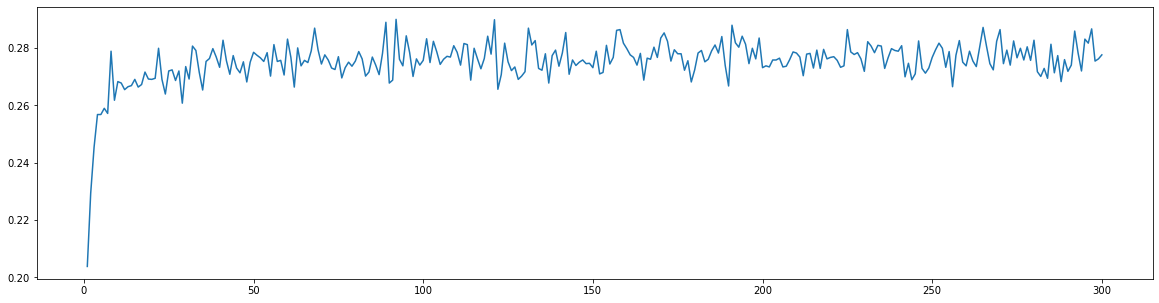

In [108]:
# Find best n_estimator
superpa_n = []
for i in range(300):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=i+1, random_state=90)
    rfr_s = cross_validation(rfr, X_new, target)
    superpa_n.append(rfr_s)
print(max(superpa_n),superpa_n.index(max(superpa_n)))
plt.figure(figsize=[20,5])
plt.plot(range(1,301),superpa_n)
plt.show()

In [109]:
# max depth
superpa_n = []
for i in range(1, 51):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=91, max_depth=i, random_state=90)
    rfr_s = cross_validation(rfr, X_new, target)
    superpa_n.append(rfr_s)

print('Best parameter: {}, best score: {}'.format(superpa_n.index(max(superpa_n)), max(superpa_n)))

Best parameter: 36, best score: 0.29054916985951473


In [110]:
# min sample leaf
superpa_n = []
for i in range(1, 21):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=91, min_samples_leaf=i, random_state=90)
    rfr_s = cross_validation(rfr, X_new, target)
    superpa_n.append(rfr_s)

print('Best parameter: {}, best score: {}'.format(superpa_n.index(max(superpa_n)), max(superpa_n)))

Best parameter: 6, best score: 0.28518518518518515


In [111]:
# min sample split
superpa_n = []
for i in range(2, 22):
    rfr = RandomForestRegressor(criterion='squared_error', n_estimators=91, min_samples_leaf=11, min_samples_split=i, random_state=90)
    rfr_s = cross_validation(rfr, X_new, target)
    superpa_n.append(rfr_s)

print('Best parameter: {}, best score: {}'.format(superpa_n.index(max(superpa_n)), max(superpa_n)))

Best parameter: 12, best score: 0.2856960408684547


In [80]:
# max features
superpa_n = []
for i in range(5, 35):
    rfr = RandomForestRegressor(criterion='squared_error',  n_estimators=91, min_samples_leaf=11, min_samples_split=10, max_features=i, random_state=90)
    rfr_s = cross_validation(rfr, X_new, target)
    superpa_n.append(rfr_s)

print('Best parameter: {}, best score: {}'.format(superpa_n.index(max(superpa_n)), max(superpa_n)))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\LI RUIQIAN\AppData\Local\Temp\ipykernel_40212\3837186128.py", line 5, in <cell line: 3>
    rfr_s = cross_validation(rfr, X_new, target)
  File "C:\Users\LI RUIQIAN\AppData\Local\Temp\ipykernel_40212\2177427530.py", line 6, in cross_validation
    model.fit(X_train_cross, Y_train_cross)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    "len(estimators_)=%d when warm_start==True"
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

In [134]:
# End result
rfr_cohesion_new=RandomForestRegressor(criterion='squared_error'
                                       , n_estimators=92
#                                        , max_depth=36
#                                        , min_samples_leaf=6
#                                        , min_samples_split=12
                                        , random_state=90
                                         )
rfr_cohesion_new.fit(Xtrain, Ytrain_cohesion)

pred_new=rfr_cohesion_new.predict(Xtest)
results_new=result(pred_new.tolist())
score_mod=accuracy(Ytest_vocab.tolist(), results_new)
score_mod

0.3895274584929757

In [144]:
score_mod_range=accuracy_range(Ytest_vocab, pred_new)
score_mod_range

0.6002554278416348

In [141]:
error_rate(Ytest_vocab, results_new)

0.39080459770114945

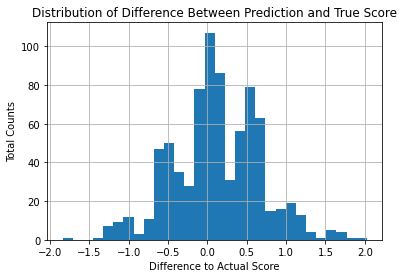

In [177]:
result_diff_plot(Ytest_vocab, pred_new)

As compared to without prediction for vocabulary as a feature, the accuracy improves from 0.333 to 0.390, accuracy_range performance slightly drops, but from the difference plot, the distribution of error is more concentrated around 0.

In [135]:
new_feature_names=feature_names
new_feature_names.append('vocab_pred')

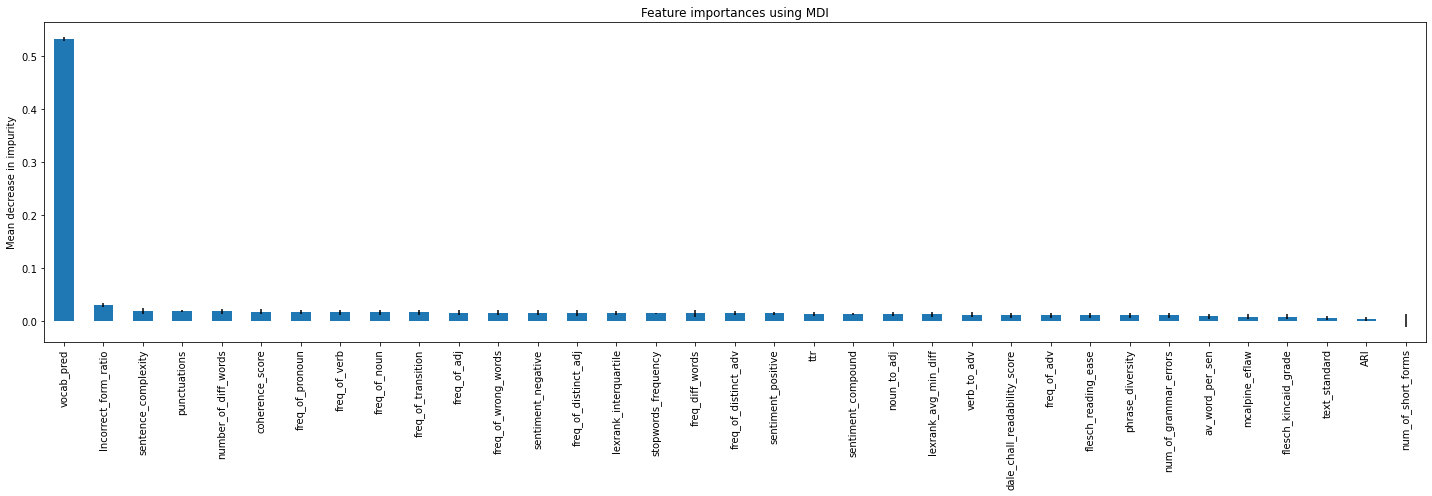

In [136]:
# Feature Importance using MDI
importances = rfr_cohesion_new.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_cohesion_new.estimators_], axis=0)

forest_importances = pd.Series(importances, index=new_feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

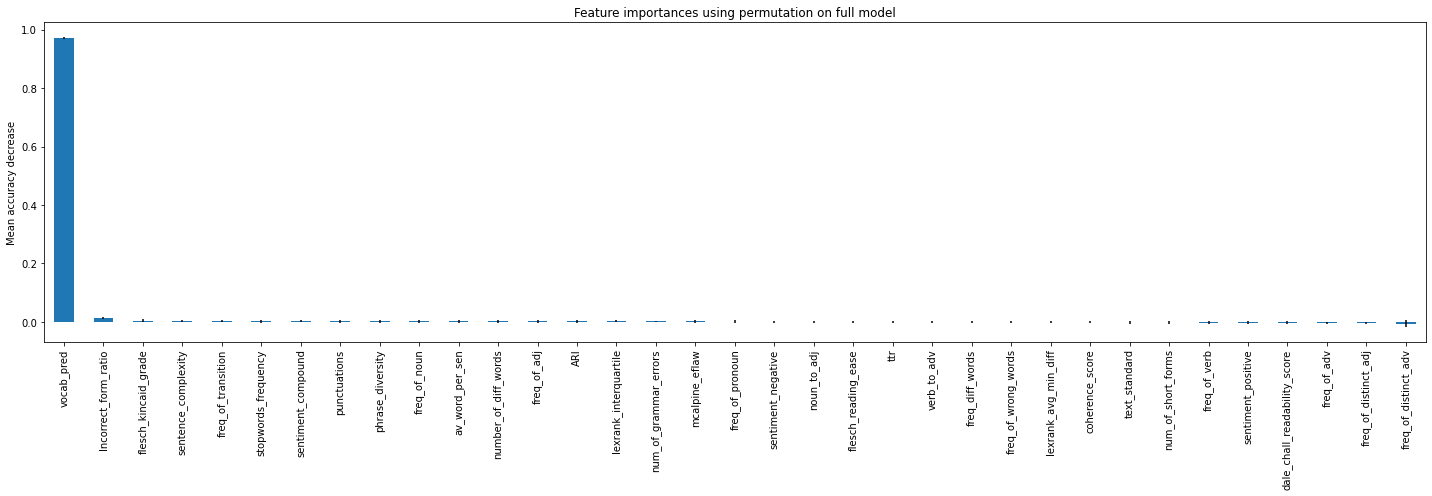

In [137]:
# Feature importance using permutation importance
result = permutation_importance(rfr_cohesion_new, Xtest, Ytest, n_repeats=10, random_state=90, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=new_feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

The prediciton for vocabulary has a strictly dominant effect on the prediction for cohesion.